# Diabetes Dataset

# 1. import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Data Gathering

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
x = df.drop('Outcome', axis =1)
y = df['Outcome']

In [5]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Split Data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=1, stratify=y)

In [7]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

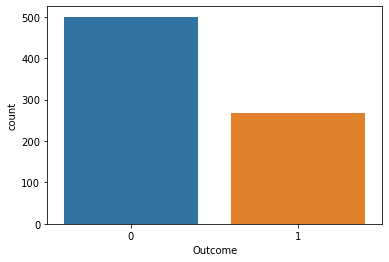

In [8]:
sns.countplot(df['Outcome'])

# Build Decision tree Model

In [9]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [10]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

# Testing Data Accuracy

In [11]:
y_pred_test = dt_model.predict(x_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.7077922077922078

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154




array([[79, 21],
       [24, 30]], dtype=int64)

# Training Data Accuracy

In [12]:
y_pred_train = dt_model.predict(x_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614




array([[400,   0],
       [  0, 214]], dtype=int64)

# Plot Decision Tree

In [13]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree = dt_model, feature_names = df.columns, class_names = ['0','1'],
                filled = True)

plt.savefig('DT.png')

# Hyperparameter Tuning

# 1. GridSearchCv

In [14]:
hyperparameters = {'criterion' :['gini','entropy'],
                  'max_depth' : np.arange(2,10),
                  'min_samples_split' : np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()
gscv_dt_model = GridSearchCV(dt_model, hyperparameters, cv = 5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [15]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 19}

In [16]:
best_model = DecisionTreeClassifier(max_depth = 6,
                                    min_samples_leaf= 6,
                                    min_samples_split= 13)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=13)

# Testing Data Accuracy

In [17]:
y_pred_test = best_model.predict(x_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.7597402597402597

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154




array([[86, 14],
       [23, 31]], dtype=int64)

# Training Data Accuracy 

In [18]:
y_pred_train = best_model.predict(x_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 0.8387622149837134

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       400
           1       0.78      0.76      0.77       214

    accuracy                           0.84       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.84      0.84      0.84       614




array([[353,  47],
       [ 52, 162]], dtype=int64)

# 2. RandomizedSearchCv

In [19]:
hyperparameters = {'criterion' :['gini','entropy'],
                  'max_depth' : np.arange(2,10),
                  'min_samples_split' : np.arange(2,21),
                  'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()
rscv_dt_model = RandomizedSearchCV(dt_model, hyperparameters, cv = 5)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [20]:
rscv_dt_model.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 12,
 'max_depth': 2,
 'criterion': 'gini'}

In [21]:
best_model = DecisionTreeClassifier(criterion ='entropy',
                                    max_depth = 3,
                                    min_samples_leaf= 2,
                                    min_samples_split= 16)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=16)

# testing Data Accuracy

In [22]:
y_pred_test = best_model.predict(x_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.7532467532467533

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154




array([[89, 11],
       [27, 27]], dtype=int64)

# Training Data Accuracy

In [23]:
y_pred_train = best_model.predict(x_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 0.7768729641693811

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.73      0.57      0.64       214

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614




array([[354,  46],
       [ 91, 123]], dtype=int64)

# plot Decision Tree

In [24]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=16)

In [25]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree = best_model, feature_names = df.columns, class_names = ['0','1'],
                filled = True)

plt.savefig('DT_RSCV_Hyperparameters.png')

# Pruning

In [51]:
dt_model = DecisionTreeClassifier(ccp_alpha = 0.004274040615823919)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004274040615823919)

In [42]:
values = dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = values['ccp_alphas']
ccp_alphas

array([0.        , 0.00135722, 0.00142508, 0.0014477 , 0.0014477 ,
       0.0014806 , 0.00149294, 0.00154723, 0.00157438, 0.00160409,
       0.00161474, 0.00175434, 0.00193027, 0.0019544 , 0.00217155,
       0.00217155, 0.0021987 , 0.00226203, 0.00230205, 0.00231632,
       0.00238505, 0.00243823, 0.002443  , 0.002443  , 0.002443  ,
       0.00252652, 0.00257255, 0.00260586, 0.00260586, 0.0026152 ,
       0.00263506, 0.00267249, 0.0027115 , 0.00283775, 0.00284001,
       0.00285016, 0.0029316 , 0.0029316 , 0.0029316 , 0.00300677,
       0.00315862, 0.00327295, 0.00339305, 0.00346049, 0.0037484 ,
       0.00384586, 0.00391397, 0.00427404, 0.00428243, 0.00463828,
       0.00481021, 0.00500358, 0.00500745, 0.00661636, 0.00778397,
       0.00821741, 0.01140636, 0.01858956, 0.02517158, 0.0871409 ])

In [44]:
train_accuracy = []
test_accuracy = []

for ccp_alpha in ccp_alphas:
#     print(ccp_alpha)
    dt_model = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state = 1)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

In [47]:
max(test_accuracy)

0.7727272727272727

In [48]:
test_accuracy.index(max(test_accuracy))

47

In [49]:
train_accuracy[47]

0.8534201954397395

In [50]:
ccp_alphas[47]

0.004274040615823919

# Testing Data Accuracy

In [52]:
y_pred_test = dt_model.predict(x_test)
y_pred_test[0:5]

testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 0.7727272727272727

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154




array([[85, 15],
       [20, 34]], dtype=int64)

In [53]:
y_pred_train = dt_model.predict(x_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 0.8534201954397395

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       400
           1       0.79      0.79      0.79       214

    accuracy                           0.85       614
   macro avg       0.84      0.84      0.84       614
weighted avg       0.85      0.85      0.85       614




array([[354,  46],
       [ 44, 170]], dtype=int64)

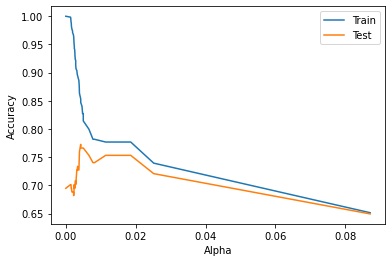

In [59]:
fig,ax = plt.subplots()

ax.plot(ccp_alphas,train_accuracy, label = 'Train' )
ax.plot(ccp_alphas,test_accuracy, label = 'Test' )
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.legend()

In [61]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree = dt_model, feature_names = df.columns, class_names = ['0','1'],
                filled = True)
plt.savefig('DT_CCP.png')